In [1]:
import mmcv
import numpy as np
from pycocotools import mask as mask_utils

In [3]:
# 假设你有一个 mmdetection 输出的 mask
mask = np.random.randint(2, size=(100, 100), dtype=np.uint8)

# 将二进制掩码转换为 RLE 编码
rle_encoded = mask_utils.encode(np.array(mask[:, :, None], order='F'))[0]

# 将 RLE 编码解码为二进制掩码
decoded_mask = mask_utils.decode([rle_encoded])

# 显示原始 mask 和解码后的 mask
mmcv.imshow_bboxes(mask, [mask], colors=[(0, 255, 0)], thickness=2, show=True)
# mmcv.imshow_bboxes('Decoded Mask', [decoded_mask], colors=[(0, 255, 0)], thickness=2, show=True)

error: OpenCV(4.7.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [5]:
from shapely.geometry import Polygon
from pycocotools import mask as mask_utils

In [6]:
# 示例使用
polygon = [[0, 0], [100, 0], [100, 100], [0, 100]]  # 一个简单的正方形

In [7]:
 poly = Polygon(polygon)

In [8]:
 # 获取多边形的轮廓
exterior = list(poly.exterior.coords)

# 创建 COCO 格式的分割掩码
segmentation = [int(coord) for xy in exterior for coord in xy]

In [18]:
segmentation

[0, 0, 100, 0, 100, 100, 0, 100, 0, 0]

In [16]:
import numpy as np

In [17]:
rle_encoded = mask_utils.frPyObjects([np.array(polygon)], image_height, image_width)

TypeError: Argument 'bb' has incorrect type (expected numpy.ndarray, got list)

In [12]:
rle_encoded

[{'size': [100, 100], 'counts': b'0`h9'}]

In [48]:
def polygon_to_rle(polygon, image_height, image_width):
    # 创建一个 Shapely 多边形对象
    poly = Polygon(polygon)
    
    # 获取多边形的轮廓
    exterior = list(poly.exterior.coords)
    
    # 创建 COCO 格式的分割掩码
    segmentation = [int(coord) for xy in exterior for coord in xy]
    
    # 将分割掩码编码为 RLE
    rle_encoded = mask_utils.frPyObjects([segmentation], image_height, image_width)
    
    return rle_encoded

# 示例使用
polygon = [[10, 10], [50, 10], [50, 50], [10, 50]]  # 一个简单的正方形
image_height, image_width = 100, 100  # 图像的高度和宽度，根据实际情况设置

rle_encoded = polygon_to_rle(polygon, image_height, image_width)
print(rle_encoded)
binary_mask = mask_utils.decode(rle_encoded)
plt.imshow(binary_mask)

[{'size': [100, 100], 'counts': b'bo0X1l100000000000000000000000000000000000000000000000000000000000000000000000000000nk4'}]


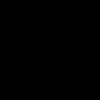

In [19]:
from PIL import Image, ImageDraw
from shapely.geometry import Polygon

def polygon_to_binary_mask(polygon, image_size):
    # 创建一个空白图像
    image = Image.new("L", image_size, 0)
    draw = ImageDraw.Draw(image)

    # 创建一个 Shapely 多边形对象并绘制到图像上
    poly = Polygon(polygon)
    exterior = list(poly.exterior.coords)
    draw.polygon(exterior, outline=1, fill=1)

    # 将图像转换为二进制掩码
    binary_mask = image.convert("1")

    return binary_mask

# 示例使用
polygon = [[10, 10], [50, 10], [50, 50], [10, 50]]  # 一个简单的正方形
image_size = (100, 100)  # 图像的大小，根据实际情况设置

binary_mask = polygon_to_binary_mask(polygon, image_size)
# binary_mask.show()


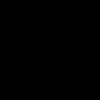

In [23]:
binary_mask_array = np.array(binary_mask)

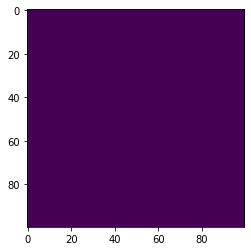

In [25]:
import matplotlib.pyplot as plt
plt.imshow(binary_mask_array)

In [26]:
binary_mask_array.sum()

0

In [27]:
image = Image.new("L", image_size, 0)
draw = ImageDraw.Draw(image)

# 创建一个 Shapely 多边形对象并绘制到图像上
poly = Polygon(polygon)
exterior = list(poly.exterior.coords)
draw.polygon(exterior, outline=1, fill=1)

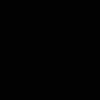

In [31]:
image

In [41]:
import cv2
def poly2mask(points, width, height):
    mask = np.zeros((width, height), dtype=np.int32)
    obj = np.array([points], dtype=np.int32)
    cv2.fillPoly(mask, obj, 1)
    return mask

polygon= [[10, 10], [50, 10], [50, 50], [10, 50]]

mask = poly2mask(polygon, 100, 100)

plt.imshow(mask)